# SmartSifter

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
import seaborn as sns

## SDLEアルゴリズム

In [37]:
random.seed(0)
T = 100000
x = np.array([math.floor(random.random()*6) for i in range(T)])

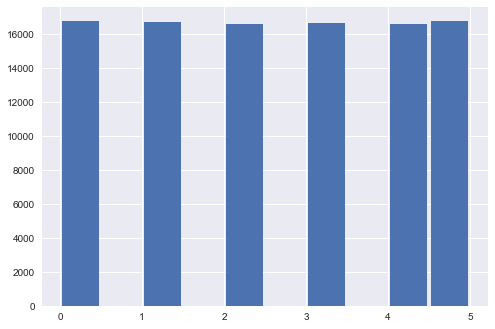

In [38]:
plt.hist(x, rwidth=0.9)
plt.show()

In [50]:
class SDLE:
    def __init__(self, r, beta, M, T):
        """
        """
        self.r = r
        self.beta = beta
        self.M = M
        self.t = 1
        self.count = np.zeros((T+1, M))
        self.T_t = np.zeros((T+1, M))
        self.T = T
        self.prob = np.zeros((T+1, M))
    
    def update(self, x_t):
        """
        オンライン学習
        """
        for i in range(self.M):
            delta = 0
            if i == x_t:
                delta = 1

            self.T_t[self.t, i] = (1 - self.r) * self.T_t[self.t-1, i] + delta
            self.count[self.t, i] = self.count[self.t-1, i] + delta
            if self.r == 0:
                q = (self.T_t[self.t, i] + self.beta) / (self.t + self.M * self.beta)
                # self.prob[self.t, i] = q / self.count[self.t, i]
                # self.prob[self.t, i] = q
            else:
                q = (self.T_t[self.t, i] + self.beta) / ((1 - (1 - self.r) ** self.t) / self.r + self.M * self.beta)
                # self.prob[self.t, i] = q
                # self.prob[self.t, i] = q / self.count[self.t, i]
            
            if not self.count[self.t, i] == 0:
                self.prob[self.t, i] = q / self.count[self.t, i]

        self.t += 1
    
    def train(self, x):
        """
        バッチ学習
        """
        while self.t <= self.T:
            self.update(x[self.t-1])

In [51]:
r = 0.1
beta = 1
M = len(np.unique(x))

sdle = SDLE(r, beta, M, T)
# print("t = %s" % sdle.t)
# print("count:\n", sdle.count)
# print("prob:\n",sdle.prob)

In [52]:
sdle.train(x)
# for idx in x:
#     sdle.update(idx)

In [53]:
p = sdle.prob[-1] * (1/sdle.prob[-1].sum())
p

array([ 0.23835192,  0.09524788,  0.17722938,  0.18422095,  0.15866785,
        0.14628202])

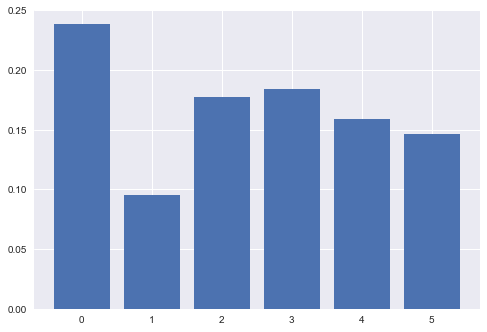

In [54]:
plt.bar(range(6), p)
plt.show()

## SDEMアルゴリズム